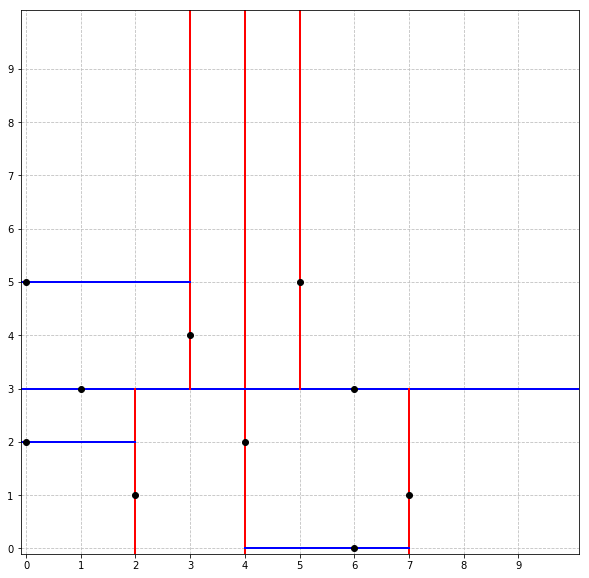

In [3]:
from collections import namedtuple
from operator import itemgetter
from pprint import pformat
 
class Node(namedtuple('Node', 'location left_child right_child')):
    def __repr__(self):
        return pformat(tuple(self))
def kdtree(point_list, depth=0):
    try:
        k = len(point_list[0])
    except IndexError:
        return None
    axis = depth % k
    point_list.sort(key=itemgetter(axis))
    median = len(point_list) // 2         
    return Node(
        location=point_list[median],
        left_child=kdtree(point_list[:median], depth + 1),
        right_child=kdtree(point_list[median + 1:], depth + 1)
    )
min_val = 0   
max_val = 10  
filename = 'points.txt'

import random
import numpy as np
def generate_point_list(filename):
    a = open(filename,'r')
    str = a.read()
    str = str.replace('\n', ' ')
    arr = str.split(' ')
    for e,i in enumerate(arr):
        arr[e]=int(i)
    p = []
    for i in range(0,len(arr)-1,2):
        p.append((arr[i],arr[i+1]))
    return p,len(arr)-1
point_list, n= generate_point_list(filename)

tree = kdtree(point_list)
import matplotlib.pyplot as plt

def plot_tree(tree, min_x, max_x, min_y, max_y, prev_node, branch, depth=0):
    cur_node = tree.location        
    left_branch = tree.left_child   
    right_branch = tree.right_child 
    k = len(cur_node)
    axis = depth % k
    if axis == 0:
        if branch is not None and prev_node is not None:
            if branch:
                max_y = prev_node[1]
            else:
                min_y = prev_node[1]
        plt.plot([cur_node[0],cur_node[0]], [min_y,max_y], linestyle='-', color='red', linewidth=2.)
    elif axis == 1:
        if branch is not None and prev_node is not None:
            if branch:
                max_x = prev_node[0]
            else:
                min_x = prev_node[0]
        plt.plot([min_x,max_x], [cur_node[1],cur_node[1]], linestyle='-', color='blue', linewidth=2.)
    plt.plot(cur_node[0], cur_node[1], 'ko')
 

    if left_branch is not None:
        plot_tree(left_branch, min_x, max_x, min_y, max_y, cur_node, True, depth+1)
 
    if right_branch is not None:
        plot_tree(right_branch, min_x, max_x, min_y, max_y, cur_node, False, depth+1)
plt.figure(figsize=(10., 10.))
plt.axis( [min_val-0.1, max_val+0.1, min_val-0.1, max_val+0.1] )
plt.grid(b=True, which='major', color='0.75', linestyle='--')
plt.xticks([i for i in range(int(min_val-0.1), int(max_val+0.1), 1)])
plt.yticks([i for i in range(int(min_val-0.1), int(max_val+0.1), 1)])
plot_tree(tree, min_val-0.1, max_val+0.1, min_val-0.1, max_val+0.1, None, None) 

plt.show()
plt.close()